# 1. Data Types (and associated expressions)

## 1.1 Numeric Data

| Data Type     | Storage | Signed Range                       | Unsigned Range                     |
|---------------|---------|------------------------------------|------------------------------------|
| `TINYINT`     | 1 byte  | -128 to 127                        | 0 to 255                           |
| `SMALLINT`    | 2 bytes | -32,768 to 32,767                  | 0 to 65,535                        |
| `MEDIUMINT`   | 3 bytes | -8,388,608 to 8,388,607            | 0 to 16,777,215                    |
| `INT`         | 4 bytes | -2,147,483,648 to 2,147,483,647    | 0 to 4,294,967,295                 |
| `BIGINT`      | 8 bytes | -9,223,372,036,854,775,808 to   9,223,372,036,854,775,807     | 0 to 18,446,744,073,709,551,615    |
| `DECIMAL`     | Varies  | Depends on precision and scale     | Depends on precision and scale     |
| `NUMERIC`     | Varies  | Depends on precision and scale     | Depends on precision and scale     |
| `FLOAT(p, s)`       | 4 bytes | ~-3.402823466E+38 to ~3.402823466E+38 | 0 to ~3.402823466E+38             |
| `DOUBLE(p, s)`      | 8 bytes | ~-1.7976931348623157E+308 to ~1.7976931348623157E+308      | 0 to ~1.7976931348623157E+308      |
| `BIT`         | Varies  | 0 to 2^n-1 (n = number of bits)    | 0 to 2^n-1 (n = number of bits)    |

__Precision__ (p) - total number of allowable digits (sum of digits before and after the decimal point)  
__Scale__ (s) - total number of allowable digits to the right of decimal point  
__p__ ans __s__ are optional, not required

To shift from **Signed Range** to **Unsigned range** you need to specify its type:
- **While Creating Table**:
```sql
CREATE TABLE table_name (
    column_name INT UNSIGNED);
```
- **Change existing column type with `MODIFY` Clause**:
```sql
ALTER TABLE table_name
MODIFY COLUMN column_name INT UNSIGNED;
```
- **Change existing column type and its name with `CHANGE` Clause**:
```sql
ALTER TABLE table_name
CHANGE column_name new_column_name INT UNSIGNED;
```

### 1.1.1 Numeric Operations on Numeric Data

#### 1.1.1.1 Arithmetic Operations

| Operation | Symbol | Example SQL Query                                       | Description                                    |
|-----------|--------|---------------------------------------------------------|------------------------------------------------|
| Addition  | `+`    | `SELECT price + 10 AS new_price FROM products;`         | Adds two numbers.                              |
| Subtraction | `-`  | `SELECT price - 5 AS discounted_price FROM products;`   | Subtracts one number from another.             |
| Multiplication | `*`| `SELECT price * 1.2 AS increased_price FROM products;`  | Multiplies two numbers.                        |
| Division   | `/`   | `SELECT price / 2 AS half_price FROM products;`         | Divides one number by another.                 |
| Modulus    | `%`   | `SELECT price % 3 AS remainder FROM products;`          | Finds the remainder of division.               |

#### 1.1.1.2 Comparison Operations

| Operation        | Symbol | Example SQL Query                                 | Description                                  |
|------------------|--------|---------------------------------------------------|----------------------------------------------|
| Equal to         | `=`    | `SELECT * FROM products WHERE price = 100;`       | Checks if two values are equal.              |
| Not equal to     | `!=` or `<>` | `SELECT * FROM products WHERE price != 100;` | Checks if two values are not equal.          |
| Greater than     | `>`    | `SELECT * FROM products WHERE price > 100;`       | Checks if one value is greater than another. |
| Less than        | `<`    | `SELECT * FROM products WHERE price < 100;`       | Checks if one value is less than another.    |
| Greater than or equal to | `>=` | `SELECT * FROM products WHERE price >= 100;` | Checks if one value is greater than or equal to another. |
| Less than or equal to | `<=` | `SELECT * FROM products WHERE price <= 100;`   | Checks if one value is less than or equal to another. |

#### 1.1.1.3 Aggregate Functions

| Function | Example SQL Query                             | Description                              |
|----------|-----------------------------------------------|------------------------------------------|
| SUM()    | `SELECT SUM(price) AS total_price FROM products;`  | Calculates the total sum of a column.    |
| AVG()    | `SELECT AVG(price) AS average_price FROM products;`| Calculates the average value of a column.|
| MIN()    | `SELECT MIN(price) AS minimum_price FROM products;`| Finds the minimum value in a column.     |
| MAX()    | `SELECT MAX(price) AS maximum_price FROM products;`| Finds the maximum value in a column.     |
| COUNT()  | `SELECT COUNT(*) AS product_count FROM products;`  | Counts the number of rows.               |

#### 1.1.1.4 Mathematical Functions

| Function   | Example SQL Query                               | Description                                  |
|------------|-------------------------------------------------|----------------------------------------------|
| ABS()      | `SELECT ABS(-1) AS absolute_value;`             | Returns the absolute value.                  |
| CEILING()  | `SELECT CEILING(1.5) AS ceiling_value;`         | Returns the smallest integer greater than or equal to a value. |
| FLOOR()    | `SELECT FLOOR(1.5) AS floor_value;`             | Returns the largest integer less than or equal to a value. |
| ROUND()    | `SELECT ROUND(1.2345, 2) AS rounded_value;`     | Rounds a number to a specified number of decimal places. |
| POWER()    | `SELECT POWER(2, 3) AS power_value;`            | Returns a number raised to the power of another number. |
| SQRT()     | `SELECT SQRT(16) AS square_root;`               | Returns the square root of a number.         |
| MOD()      | `SELECT MOD(10, 3) AS remainder;`               | Returns the remainder of a division.         |

#### 1.1.1.5 Bitwise Operations

| Operation     | Symbol | Example SQL Query                       | Description                              |
|---------------|--------|-----------------------------------------|------------------------------------------|
| AND           | `&`    | `SELECT 5 & 3 AS bitwise_and;`          | Performs a bitwise AND operation.        |
| OR            | `\|`    | `SELECT 5 \| 3 AS bitwise_or;`           | Performs a bitwise OR operation.         |
| XOR           | `^`    | `SELECT 5 ^ 3 AS bitwise_xor;`          | Performs a bitwise XOR operation.        |
| NOT           | `~`    | `SELECT ~5 AS bitwise_not;`             | Performs a bitwise NOT operation.        |
| Shift Left    | `<<`   | `SELECT 1 << 2 AS shift_left;`          | Shifts bits to the left.                 |
| Shift Right   | `>>`   | `SELECT 4 >> 1 AS shift_right;`         | Shifts bits to the right.                |

#### 1.1.1.6 Examples

1. **Calculating Total and Average Prices**
   ```sql
   SELECT SUM(price) AS total_price, AVG(price) AS average_price FROM products;
   ```

2. **Discount Calculation**
   ```sql
   SELECT product_name, price, price * 0.9 AS discounted_price FROM products;
   ```

3. **Finding Maximum and Minimum Prices**
   ```sql
   SELECT MAX(price) AS max_price, MIN(price) AS min_price FROM products;
   ```

4. **Filtering by Price Range**
   ```sql
   SELECT * FROM products WHERE price BETWEEN 100 AND 200;
   ```

5. **Bitwise Operations for Permissions**
   ```sql
   SELECT user_id, permissions & 1 AS can_read, permissions & 2 AS can_write FROM users;
   ```

### 1.1.2  Converting Numeric Data Types to Other Types

| **Function** | **Purpose**                          | **Syntax**                                        | **Example**                                          |
|--------------|--------------------------------------|---------------------------------------------------|------------------------------------------------------|
| `CAST()`     | Convert numeric to specified type    | `CAST(expression AS target_type)`                 | `SELECT CAST(price AS CHAR) AS price_text FROM products;` |
| `CONVERT()`  | Convert numeric to specified type    | `CONVERT(expression, target_type)`                | `SELECT CONVERT(price, CHAR) AS price_text FROM products;` |
| `FORMAT()`   | Format numeric values as strings     | `FORMAT(number, decimal_places)`                  | `SELECT FORMAT(price, 2) AS formatted_price FROM products;` |
| `ROUND()`    | Round numeric value to specified places | `ROUND(number, decimal_places)`                   | `SELECT ROUND(price, 2) AS rounded_price FROM products;` |

### 1.1.3  Converting Numeric Data Types to Other Types

ta Types**

| **Function**          | **Purpose**                        | **Syntax**                                          | **Example**                                             |
|-----------------------|------------------------------------|-----------------------------------------------------|---------------------------------------------------------|
| `CAST()`              | Convert non-numeric to numeric type | `CAST(expression AS target_type)`                   | `SELECT CAST(some_string AS DECIMAL(10,2)) AS numeric_value FROM table_name;` |
| `CONVERT()`           | Convert non-numeric to numeric type | `CONVERT(expression, target_type)`                  | `SELECT CONVERT(some_string, DECIMAL(10,2)) AS numeric_value FROM table_name;` |
| `UNIX_TIMESTAMP()`    | Convert date/time to UNIX timestamp | `UNIX_TIMESTAMP(date_time_value)`                   | `SELECT UNIX_TIMESTAMP(NOW()) AS current_timestamp;` |
| `CONVERT_TZ()`        | Convert datetime to another timezone | `CONVERT_TZ(date_time_value, from_timezone, to_timezone)` | `SELECT UNIX_TIMESTAMP(CONVERT_TZ(NOW(), 'UTC', 'America/New_York')) Asyntax and examples.

### 1.1.4  Date and Time Calculations

| **Function**       | **Purpose**                                      | **Syntax**                                                | **Example**                                            |
|--------------------|--------------------------------------------------|-----------------------------------------------------------|--------------------------------------------------------|
| `DATE_ADD()`       | Adds a time interval to a date                  | `DATE_ADD(date, INTERVAL value unit)`                     | `SELECT DATE_ADD(NOW(), INTERVAL 10 DAY) AS future_date;` |
| `DATE_SUB()`       | Subtracts a time interval from a date            | `DATE_SUB(date, INTERVAL value unit)`                     | `SELECT DATE_SUB(NOW(), INTERVAL 1 MONTH) AS past_date;` |
| `DATEDIFF()`       | Calculates the difference between two dates in days | `DATEDIFF(date1, date2)`                                 | `SELECT DATEDIFF(NOW(), '2024-01-01') AS days_difference;` |
| `TIMESTAMPDIFF()`  | Calculates the difference between two dates in various units | `TIMESTAMPDIFF(unit, date1, date2)`                      | `SELECT TIMESTAMPDIFF(DAY, '2024-01-01', NOW()) AS days_difference;` |
| `NOW()`            | Returns the current date and time                | `NOW()`                                                   | `SELECT NOW() AS current_datetime;`                    |
| `CURDATE()`        | Returns the current date                        | `CURDATE()`                                               | `SELECT CURDATE() AS current_date;`                    |
| `CURTIME()`        | Returns the current time                        | `CURTIME()`                                               | `SELECT CURTIME() AS current_time;`                    |
| `ADDDATE()`        | Adds a time interval to a date (similar to `DATE_ADD()`) | `ADDDATE(date, INTERVAL value unit)`                      | `SELECT ADDDATE(NOW(), INTERVAL 10 DAY) AS future_date;` |
| `SUBDATE()`        | Subtracts a time interval from a date (similar to `DATE_SUB()`) | `SUBDATE(date, INTERVAL value unit)`                      | `SELECT SUBDATE(NOW(), INTERVAL 1 MONTH) AS past_date;` |
| `EXTRACT()`        | Extracts a specific part of a date or time       | `EXTRACT(unit FROM date)`                                | `SELECT EXTRACT(YEAR FROM NOW()) AS current_year;`     |

## 1.2 Character and String Data

character and string data types are used to store textual data. These data types include various methods for manipulation, conversion, and querying of string data.

| **Data Type** | **Description**                                  | **Examples**                        |
|---------------|--------------------------------------------------|-------------------------------------|
| `CHAR(n)`     | Fixed-length string with `n` characters         | `CHAR(10)`                          |
| `VARCHAR(n)`  | Variable-length string with a maximum of `n` characters | `VARCHAR(255)`                      |
| `TEXT`        | Large text field, up to 65,535 bytes            | `TEXT`                               |
| `MEDIUMTEXT`  | Medium-sized text field, up to 16,777,215 bytes | `MEDIUMTEXT`                         |
| `LONGTEXT`    | Very large text field, up to 4,294,967,295 bytes | `LONGTEXT`                           |
| `TINYBLOB`    | Very small binary large object, up to 255 bytes  | `TINYBLOB`                           |
| `BLOB`        | Binary large object, up to 65,535 bytes          | `BLOB`                               |
| `MEDIUMBLOB`  | Medium-sized binary large object, up to 16,777,215 bytes | `MEDIUMBLOB`                         |
| `LONGBLOB`    | Very large binary large object, up to 4,294,967,295 bytes | `LONGBLOB`                           |
| `BINARY(n)`   | Fixed-length binary string with `n` bytes        | `BINARY(10)`                         |
| `VARBINARY(n)`| Variable-length binary string with a maximum of `n` bytes | `VARBINARY(255)`                    |

### 1.2.1 String Operations

#### 1.2.1.1 String Functions

| **Function**          | **Purpose**                                | **Syntax**                                                | **Example**                                            |
|-----------------------|--------------------------------------------|-----------------------------------------------------------|--------------------------------------------------------|
| `CHAR_LENGTH()`       | Returns the number of characters in a string | `CHAR_LENGTH(string)`                                    | `SELECT CHAR_LENGTH('Hello') AS length;`             |
| `CONCAT()`            | Concatenates two or more strings            | `CONCAT(string1, string2, ...)`                           | `SELECT CONCAT('Hello', ' ', 'World') AS greeting;`  |
| `SUBSTRING()`         | Extracts a substring from a string          | `SUBSTRING(string, start, length)`                       | `SELECT SUBSTRING('Hello World', 1, 5) AS part;`     |
| `LEFT()`              | Returns the left part of a string           | `LEFT(string, length)`                                   | `SELECT LEFT('Hello World', 5) AS left_part;`        |
| `RIGHT()`             | Returns the right part of a string          | `RIGHT(string, length)`                                  | `SELECT RIGHT('Hello World', 5) AS right_part;`      |
| `REPLACE()`           | Replaces occurrences of a substring         | `REPLACE(string, old_substring, new_substring)`           | `SELECT REPLACE('Hello World', 'World', 'MySQL') AS replaced;` |
| `TRIM()`              | Removes leading and trailing spaces          | `TRIM(string)`                                           | `SELECT TRIM('   Hello World   ') AS trimmed;`      |
| `UPPER()`             | Converts a string to uppercase               | `UPPER(string)`                                          | `SELECT UPPER('Hello') AS upper_case;`               |
| `LOWER()`             | Converts a string to lowercase               | `LOWER(string)`                                          | `SELECT LOWER('HELLO') AS lower_case;`               |
| `LENGTH()`            | Returns the length of a string in bytes      | `LENGTH(string)`                                         | `SELECT LENGTH('Hello') AS byte_length;`             |

#### 1.2.1.2 Pattern Matching

| **Function**        | **Purpose**                                 | **Syntax**                              | **Example**                                           |
|---------------------|---------------------------------------------|-----------------------------------------|-------------------------------------------------------|
| `LIKE`              | Performs pattern matching with wildcards    | `column LIKE pattern`                   | `SELECT * FROM users WHERE name LIKE 'A%';`         |
| `REGEXP`            | Performs pattern matching with regular expressions | `column REGEXP pattern`                 | `SELECT * FROM users WHERE name REGEXP '^[A-Za-z]';` |
| `RLIKE`             | Synonym for `REGEXP`                        | `column RLIKE pattern`                  | `SELECT * FROM users WHERE name RLIKE '[0-9]';`     |

**LIKE** Expressions

| **Wildcard** | **Description**                              | **Example**               | **Matches**                                              | **Does Not Match**                                      |
|--------------|----------------------------------------------|---------------------------|----------------------------------------------------------|---------------------------------------------------------|
| `%`          | Represents zero or more characters           | `a%`                      | `a`, `abc`, `alphabet`                                   | `b`, `cab`                                              |
| `_`          | Represents a single character                | `a_`                      | `ab`, `ac`, `ad`                                         | `a`, `abc`           

Syntax:  
```sql
SELECT column_name
FROM table_name
WHERE column_name LIKE pattern;
```

Examples:  
| **Pattern**  | **Description**                        | **Example Query**                                         | **Matches**                                      |
|--------------|----------------------------------------|-----------------------------------------------------------|--------------------------------------------------|
| `a%`         | Strings starting with 'a'              | `SELECT * FROM users WHERE name LIKE 'a%';`               | `a`, `alice`, `apple`                            |
| `%a`         | Strings ending with 'a'                | `SELECT * FROM users WHERE name LIKE '%a';`               | `a`, `anna`, `pa`                                |
| `%or%`       | Strings containing 'or'                | `SELECT * FROM users WHERE name LIKE '%or%';`             | `dora`, `forest`, `borrow`                       |
| `_a%`        | Strings with 'a' as the second character | `SELECT * FROM users WHERE name LIKE '_a%';`             | `marie`, `carry`, `back`                         |
| `__n%`       | Strings with 'n' as the third character | `SELECT * FROM users WHERE name LIKE '__n%';`             | `anna`, `king`, `benny`                          |
| `%a_b%`      | Strings with 'a', any character, then 'b' | `SELECT * FROM users WHERE name LIKE '%a_b%';`           | `caleb`, `rabbit`, `table`                       |
| `a%o`        | Strings starting 

If you need to search for actual `%` or `_` characters in a string, you can use the escape character `\` or define an escape character using the `ESCAPE` clause.

**Example with Escaping:**

```sql
-- Find strings containing '100%'
SELECT * FROM discounts WHERE description LIKE '%100\%%' ESCAPE '\';

-- Define a custom escape character (e.g., '!')
SELECT * FROM discounts WHERE description LIKE '%100!%%' ESCAPE '!';
```

#### 1.2.1.3 String Comparison and Searching

| **Function**        | **Purpose**                                      | **Syntax**                                | **Example**                                         |
|---------------------|--------------------------------------------------|-------------------------------------------|-----------------------------------------------------|
| `INSTR()`           | Returns the position of the first occurrence of a substring | `INSTR(string, substring)`                | `SELECT INSTR('Hello World', 'World') AS position;`|
| `LOCATE()`          | Returns the position of the first occurrence of a substring | `LOCATE(substring, string)`               | `SELECT LOCATE('World', 'Hello World') AS position;`|
| `POSITION()`        | Synonym for `LOCATE()`                          | `POSITION(substring IN string)`           | `SELECT POSITION('World' IN 'Hello World') AS position;`|
| `STRCMP()`          | Compares two strings                            | `STRCMP(string1, string2)`                | `SELECT STRCMP('Hello', 'World') AS comparison;`   |

### 1.2.2 Regular Expressions in MySQL

`REGEXP` (or its synonym `RLIKE`) allows you to use regular expressions for string matching.

| **Function** | **Purpose**                                  | **Syntax**                | **Example**                                        |
|--------------|----------------------------------------------|---------------------------|----------------------------------------------------|
| `REGEXP`     | Pattern matching using regular expressions  | `column REGEXP pattern`   | `SELECT * FROM users WHERE name REGEXP '^A';`      |
| `RLIKE`      | Synonym for `REGEXP`                        | `column RLIKE pattern`    | `SELECT * FROM users WHERE name RLIKE '[0-9]';`    |

**Main Regular Expressions**

| **Expression** | **Description**                                          | **Example**                                | **Matches**                                 |
|----------------|----------------------------------------------------------|--------------------------------------------|---------------------------------------------|
| `.`            | Any single character except newline                      | `a.b`                                      | `aab`, `acb`, `a1b`                         |
| `^`            | Start of string                                          | `^abc`                                     | `abc`, `abcdef` (not `xabc`)                |
| `$`            | End of string                                            | `abc$`                                     | `abc`, `xyzabc` (not `abcf`)                |
| `*`            | Zero or more occurrences of the previous character       | `ab*c`                                     | `ac`, `abc`, `abbc`, `abbbc`                |
| `+`            | One or more occurrences of the previous character        | `ab+c`                                     | `abc`, `abbc`, `abbbc` (not `ac`)           |
| `?`            | Zero or one occurrence of the previous character         | `ab?c`                                     | `ac`, `abc` (not `abbc`)                    |
| `[]`           | Any single character within the brackets                 | `[aeiou]`                                  | `a`, `e`, `i`, `o`, `u`                     |
| `[^]`          | Any single character not within the brackets             | `[^aeiou]`                                 | Any consonant                               |
| `{}`           | Exactly `n` occurrences of the previous character        | `a{3}`                                     | `aaa`                                       |
| `{n,}`         | `n` or more occurrences of the previous character        | `a{2,}`                                    | `aa`, `aaa`, `aaaa`, etc.                   |
| `{n,m}`        | Between `n` and `m` occurrences of the previous character | `a{2,4}`                                   | `aa`, `aaa`, `aaaa`                         |
| `\|`            | Alternation (OR)                                         | `abc\|def`                                  | `abc`, `def`                                |
| `()`           | Grouping                                                 | `(abc)+`                                   | `abc`, `abcabc`, `abcabcabc`                |
| `\d`           | Any digit (equivalent to `[0-9]`)                        | `\d`                                       | `0`, `1`, `2`, ..., `9`                     |
| `\D`           | Any non-digit (equivalent to `[^0-9]`)                   | `\D`                                       | Any non-digit character                     |
| `\w`           | Any word character (equivalent to `[A-Za-z0-9_]`)        | `\w`                                       | `a`, `A`, `1`, `_`, etc.                    |
| `\W`           | Any non-word character (equivalent to `[^A-Za-z0-9_]`)   | `\W`                                       | Any punctuation or special character        |
| `\s`           | Any whitespace character                                 | `\s`                                       | Space, tab, newline                         |
| `\S`           | Any non-whitespace character                             | `\S`                                       | Any character except whitespace             |

**Example Queries Using Regular Expressions**

```sql
-- Find all users whose names start with 'A'
SELECT * FROM users WHERE name REGEXP '^A';

-- Find all users whose names end with 'son'
SELECT * FROM users WHERE name REGEXP 'son$';

-- Find all users whose names contain any digit
SELECT * FROM users WHERE name REGEXP '[0-9]';

-- Find all users whose names have exactly three letters followed by 'son'
SELECT * FROM users WHERE name REGEXP '^.{3}son$';
```

### 1.2.3 Converting String to Other Data Types

Integer Conversion

| Function                      | Description                               | Example                          | Result  |
|-------------------------------|-------------------------------------------|----------------------------------|---------|
| `CAST(expression AS SIGNED)`  | Converts a string to an integer           | `CAST('123' AS SIGNED)`          | 123     |
| `CONVERT(expression, SIGNED)` | Converts a string to an integer           | `CONVERT('123', SIGNED)`         | 123     |

Floating-Point Conversion

| Function                          | Description                               | Example                            | Result  |
|-----------------------------------|-------------------------------------------|------------------------------------|---------|
| `CAST(expression AS DECIMAL(m, d))` | Converts a string to a floating-point number | `CAST('123.45' AS DECIMAL(10, 2))` | 123.45  |
| `CONVERT(expression, DECIMAL(m, d))`| Converts a string to a floating-point number | `CONVERT('123.45', DECIMAL(10, 2))`| 123.45  |

Date Conversion

| Function                            | Description                                    | Example                                     | Result      |
|-------------------------------------|------------------------------------------------|---------------------------------------------|-------------|
| `STR_TO_DATE(string, format)`       | Converts a string to a date based on the format| `STR_TO_DATE('08/07/2024', '%d/%m/%Y')`     | '2024-07-08'|

### 1.2.4 Converting Other Data Types to String

Converting String to Other Data Types

| Function                      | Description                               | Example                          | Result  |
|-------------------------------|-------------------------------------------|----------------------------------|---------|
| `CAST(expression AS CHAR)`    | Converts an integer to a string           | `CAST(123 AS CHAR)`              | '123'   |
| `CONVERT(expression, CHAR)`   | Converts an integer to a string           | `CONVERT(123, CHAR)`             | '123'   |

Floating-Point to String

| Function                      | Description                               | Example                          | Result  |
|-------------------------------|-------------------------------------------|----------------------------------|---------|
| `CAST(expression AS CHAR)`    | Converts a floating-point number to a string | `CAST(123.45 AS CHAR)`           | '123.45'|
| `CONVERT(expression, CHAR)`   | Converts a floating-point number to a string | `CONVERT(123.45, CHAR)`          | '123.45'|

Date to String

| Function                       | Description                               | Example                                           | Result                 |
|--------------------------------|-------------------------------------------|---------------------------------------------------|------------------------|
| `CAST(expression AS CHAR)`     | Converts a date to a string               | `CAST(NOW() AS CHAR)`                             | '2024-07-08 12:34:56'  |
| `CONVERT(expression, CHAR)`    | Converts a date to a string               | `CONVERT(NOW(), CHAR)`                            | '2024-07-08 12:34:56'  |
| `DATE_FORMAT(date, format)`    | Converts a date to a string based on format | `DATE_FORMAT('2024-07-08', '%d/%m/%Y')`           | '08/07/2024'           |

Summary Table of Conversion Functions

| Function                          | Description                                         | Example                                           |
|-----------------------------------|-----------------------------------------------------|---------------------------------------------------|
| `CAST(expression AS type)`        | Converts `expression` to the specified `type`       | `CAST('123' AS SIGNED)`                           |
| `CONVERT(expression, type)`       | Converts `expression` to the specified `type`       | `CONVERT('123', SIGNED)`                          |
| `STR_TO_DATE(string, format)`     | Converts `string` to a date based on `format`       | `STR_TO_DATE('08/07/2024', '%d/%m/%Y')`           |
| `DATE_FORMAT(date, format)`       | Converts `date` to a string based on `format`       | `DATE_FORMAT('2024-07-08', '%d/%m/%Y')`           |

## 1.3 Date/Time Data

| Data Type  | Description                             | Format                | Range                              |
|------------|-----------------------------------------|-----------------------|------------------------------------|
| DATE       | Date value                              | 'YYYY-MM-DD'          | '1000-01-01' to '9999-12-31'       |
| DATETIME   | Date and time value                     | 'YYYY-MM-DD HH:MM:SS' | '1000-01-01 00:00:00' to '9999-12-31 23:59:59' |
| TIMESTAMP  | Timestamp value                         | 'YYYY-MM-DD HH:MM:SS' | '1970-01-01 00:00:01' UTC to '2038-01-19 03:14:07' UTC |
| TIME       | Time value                              | 'HH:MM:SS'            | '-838:59:59' to '838:59:59'        |
| YEAR       | Year value                              | 'YYYY'                | 1901 to 2155                       |

In general, it is always a good idea to explicitly specify the format string with `str_to_date` function:

```sql
UPDATE person
    SET birth_date = str_to_date('DEC-21-1980' , '%b-%d-%Y')
    WHERE person_id = 1;
```

### 1.3.1 Functions for Date and Time

| Function                | Description                                                      | Example                       |
|-------------------------|------------------------------------------------------------------|-------------------------------|
| `CURDATE()`             | Returns the current date                                         | `SELECT CURDATE();`           |
| `CURTIME()`             | Returns the current time                                         | `SELECT CURTIME();`           |
| `NOW()`                 | Returns the current date and time                                | `SELECT NOW();`               |
| `DATE()`                | Extracts the date part of a date or datetime expression          | `SELECT DATE('2024-07-08 12:34:56');` |
| `TIME()`                | Extracts the time part of a date or datetime expression          | `SELECT TIME('2024-07-08 12:34:56');` |
| `YEAR()`                | Extracts the year                                                | `SELECT YEAR('2024-07-08');`  |
| `MONTH()`               | Extracts the month                                               | `SELECT MONTH('2024-07-08');` |
| `DAY()`                 | Extracts the day of the month                                    | `SELECT DAY('2024-07-08');`   |
| `HOUR()`                | Extracts the hour                                                | `SELECT HOUR('12:34:56');`    |
| `MINUTE()`              | Extracts the minute                                              | `SELECT MINUTE('12:34:56');`  |
| `SECOND()`              | Extracts the second                                              | `SELECT SECOND('12:34:56');`  |
| `DATEDIFF()`            | Returns the number of days between two dates                     | `SELECT DATEDIFF('2024-07-08', '2024-07-01');` |
| `TIMEDIFF()`            | Returns the difference between two time or datetime expressions  | `SELECT TIMEDIFF('12:34:56', '11:22:33');` |
| `DATE_ADD()`            | Adds a time interval to a date                                   | `SELECT DATE_ADD('2024-07-08', INTERVAL 10 DAY);` |
| `DATE_SUB()`            | Subtracts a time interval from a date                            | `SELECT DATE_SUB('2024-07-08', INTERVAL 10 DAY);` |
| `STR_TO_DATE()`         | Converts a string to a date                                      | `SELECT STR_TO_DATE('01,5,2024','%d,%m,%Y');` |
| `DATE_FORMAT()`         | Formats a date according to a specified format                   | `SELECT DATE_FORMAT('2024-07-08', '%W %M %Y');` |
| `UNIX_TIMESTAMP()`      | Returns the current timestamp as an integer                      | `SELECT UNIX_TIMESTAMP();`    |
| `FROM_UNIXTIME()`       | Converts an integer timestamp to a date                          | `SELECT FROM_UNIXTIME(1625140800);` |

### 1.3.2 Expressions and Formatting

| Specifier | Description             | Example              |
|-----------|-------------------------|----------------------|
| `%Y`      | Year (4 digits)         | `2024`               |
| `%y`      | Year (2 digits)         | `24`                 |
| `%m`      | Month (01-12)           | `07`                 |
| `%d`      | Day of the month (01-31)| `08`                 |
| `%H`      | Hour (00-23)            | `12`                 |
| `%i`      | Minutes (00-59)         | `34`                 |
| `%s`      | Seconds (00-59)         | `56`                 |
| `%W`      | Weekday name            | `Monday`             |
| `%M`      | Month name              | `July`               |

### 1.3.3 Examples

1. **Current Date and Time:**
    ```sql
    SELECT CURDATE();          -- '2024-07-08'
    SELECT CURTIME();          -- '12:34:56'
    SELECT NOW();              -- '2024-07-08 12:34:56'
    ```

2. **Extracting Parts of a Date:**
    ```sql
    SELECT YEAR('2024-07-08'); -- 2024
    SELECT MONTH('2024-07-08');-- 7
    SELECT DAY('2024-07-08');  -- 8
    ```

3. **Date Arithmetic:**
    ```sql
    SELECT DATE_ADD('2024-07-08', INTERVAL 10 DAY); -- '2024-07-18'
    SELECT DATE_SUB('2024-07-08', INTERVAL 10 DAY); -- '2024-06-28'
    ```

4. **Formatting Dates:**
    ```sql
    SELECT DATE_FORMAT('2024-07-08', '%W %M %Y'); -- 'Monday July 2024'
    ```

## 1.4 Binary Data `INCOMPLETE`

1.**`BINARY(n)`**:
  - **Purpose**: Stores fixed-length binary data.
  - **Size**: `n` bytes.
  - **Usage**: Ideal for storing binary data such as hashes or binary-encoded values where the length is consistent.
  - **Example**:
    ```sql
    CREATE TABLE files (
        file_signature BINARY(16)
    );
    ```

2.**`VARBINARY(n)`**:
  - **Purpose**: Stores variable-length binary data.
  - **Size**: Up to `n` bytes.
  - **Usage**: Suitable for binary data where the length can vary, such as images or files.
  - **Example**:
    ```sql
    CREATE TABLE files (
        file_data VARBINARY(255)
    );
    ```

3.**`BLOB`**:
  - **Purpose**: Stores large binary objects.
  - **Size**: Typically up to 65,535 bytes.
  - **Usage**: Used for storing large binary data like files or images.
  - **Example**:
    ```sql
    CREATE TABLE files (
        file_content BLOB
    );
    ```

4.**`MEDIUMBLOB`**:
  - **Purpose**: Stores medium-sized binary objects.
  - **Size**: Up to 16,777,215 bytes.
  - **Usage**: For larger binary data where `BLOB` might be insufficient.
  - **Example**:
    ```sql
    CREATE TABLE files (
        image MEDIUMBLOB
    );
    ```

5.**`LONGBLOB`**:
  - **Purpose**: Stores very large binary objects.
  - **Size**: Up to 4,294,967,295 bytes.
  - **Usage**: For very large binary data, such as large media files.
  - **Example**:
    ```sql
    CREATE TABLE files (
        video LONGBLOB
    );
    ```

## 1.5 Special Data `INCOMPLETE`

1.**`ENUM`**:
  - **Purpose**: Defines a column that can store one value from a predefined list of values.
  - **Usage**: Restricts the column to a set of predefined values, useful for enumerated types.
  - **Example**:
    ```sql
    CREATE TABLE orders (
        status ENUM('pending', 'shipped', 'delivered', 'cancelled')
    );
    ```

2.**`SET`**:
  - **Purpose**: Stores zero or more values from a predefined list. Each value is stored as a bit in a set.
  - **Usage**: Allows multiple values from a predefined list, suitable for flags or options.
  - **Example**:
    ```sql
    CREATE TABLE preferences (
        contact_methods SET('email', 'sms', 'phone')
    );
    ```

# 2. Data Definition Language (DDL)

## 2.1 Creating Databases

```sql
CREATE DATABASE database_name

```sql
USE database_name

## 2.2 Creating Tables

### 2.2.1 `CREATE TABLE` Statement and its structure

```sql
CREATE TABLE table_name (
    column1 datatype [constraints] [modifiers],
    column2 datatype [constraints] [modifiers],
    ...
    table_constraints
);

### 2.2.2 Column Constraints

Constraints are rules that restrict the types of data that can be inserted into a column. They ensure that the data in the database adheres to specific rules or conditions.

Types of **Constraints**:
1. `NOT NULL`:
   - Ensures that a column cannot have a NULL value.
   - Example: 
     ```sql
     column_name datatype NOT NULL
     ```

2. `UNIQUE`:
   - Ensures that all values in a column are unique across the table.
   - Example:
     ```sql
     column_name datatype UNIQUE
     ```

3. `PRIMARY KEY`:
   - Uniquely identifies each record in a table. A primary key column cannot have NULL values and must be unique.
   - Example:
     ```sql
     column_name datatype PRIMARY KEY
     ```

4. `FOREIGN KEY`:
   - Establishes a relationship between columns in different tables. It enforces referential integrity by ensuring that values in the foreign key column(s) match values in the referenced column(s) of another table.
   - Example:
     ```sql
     column_name datatype,
     FOREIGN KEY (column_name) REFERENCES other_table (column_name)
     ```

5. `CHECK`:
   - Ensures that all values in a column satisfy a specific condition.
   - Example:
     ```sql
     column_name datatype CHECK (condition)
     ```

6. `DEFAULT`:
   - Provides a default value for a column when no value is specified.
   - Example:
     ```sql
     column_name datatype DEFAULT default_value
     ```

### 2.2.3 Table Constraints

Table constraints are rules applied to the entire table and can involve multiple columns. They ensure data integrity at the table level. Some common table constraints include:

1. **PRIMARY KEY Constraint**:
   - Ensures that a combination of one or more columns is unique across the table and identifies each row uniquely.
   - Example:
     ```sql
     CONSTRAINT constraint_name PRIMARY KEY (column1, column2)
     ```

2. **FOREIGN KEY Constraint**:
   - Ensures that values in one or more columns match values in columns of another table, enforcing referential integrity.
   - Example:
     ```sql
     CONSTRAINT constraint_name FOREIGN KEY (column1) REFERENCES other_table (column2)
     ```

3. **UNIQUE Constraint**:
   - Ensures that all values in one or more columns are unique across the table.
   - Example:
     ```sql
     CONSTRAINT constraint_name UNIQUE (column1, column2)
     ```

4. **CHECK Constraint**:
   - Ensures that values in one or more columns meet a specified condition.
   - Example:
     ```sql
     CONSTRAINT constraint_name CHECK (condition)
     ```

### 2.2.4 Column Modififers

Column modifiers in SQL are attributes that further define the characteristics and behavior of columns in a table. They are used to customize how data is stored, presented, or managed.

Types of modifiers:  
1. `AUTO_INCREMENT`

- **Purpose**: Automatically generates a unique value for the column with each new row inserted. Commonly used for primary keys.
- **Usage**: Works with integer types.
- **Example**:
  ```sql
  CREATE TABLE users (
      user_id INT AUTO_INCREMENT,
      username VARCHAR(50),
      PRIMARY KEY (user_id)
  );
  ```

2. `ZEROFILL`

- **Purpose**: Pads numeric values with leading zeros up to the specified width. The column must also be defined as `UNSIGNED`.
- **Usage**: Works with numeric types.
- **Example**:
  ```sql
  CREATE TABLE products (
      product_code INT(6) ZEROFILL
  );
  ```


3. `UNSIGNED`

- **Purpose**: Indicates that the column can only store non-negative numbers.
- **Usage**: Works with numeric types (`INT`, `BIGINT`, etc.).
- **Example**:
  ```sql
  CREATE TABLE items (
      quantity INT UNSIGNED
      );
  ```

### 2.2.5 Table Commands

1. `DESC` (or `DESCRIBE`) Command  
- **Purpose**: Provides a description of the table’s structure, including column names, data types, and constraints.
- **Example**:
  ```sql
  DESC employees;
  ```

2. `SHOW TABLES` Command  
- **Purpose**: Lists all tables in the current database.
- **Example**:
  ```sql
  SHOW TABLES;
  ```

3. `SHOW CREATE TABLE` Command
- **Purpose**: Displays the `CREATE TABLE` statement used to create the specified table, including all its constraints and options.
- **Example**:
  ```sql
  SHOW CREATE TABLE employees;
  ```



4. `SHOW COLUMNS FROM` Command

- **Purpose**: Provides detailed information about the columns of a specified table, similar to `DESC`.
- **Example**:
  ```sql
  SHOW COLUMNS FROM employees;
  ```

### 2.2.6 Example

```sql
CREATE TABLE person
    (person_id SMALLINT UNSIGNED,
    fname VARCHAR(20),
    lname VARCHAR(20),
    gender ENUM('M', 'F'),
    birth_date DATE,
    street VARCHAR(30),
    city VARCHAR(20),
    state VARCHAR(20),
    country VARCHAR(20),
    postal_code VARCHAR(20),
    CONSTRAINT pk_person PRIMARY KEY (person_id)
 );
 ```

```sql
CREATE TABLE favorite_food (
    person_id SMALLINT UNSIGNED,
    food VARCHAR(20),
    CONSTRAINT pk_favorite_food PRIMARY KEY (person_id, food),
    CONSTRAINT fk_fav_food_person_id FOREIGN KEY (person_id) REFERENCES person (person_id)
);
 ```

PRIMARY KEY (person_id, food) -> This means that each combination of person_id and food must be unique across the table. Together, they uniquely identify each row in the favorite_food table.

## 2.3 Editing Tables

### 2.3.1 Columns

1. **Adding Columns**  
Adding new columns to an existing table.
- **syntax**:
```sql
ALTER TABLE table_name ADD column_name datatype [constraints];
```
- **example**:
```sql
ALTER TABLE employees ADD hire_date DATE;
```

2. **Moddifying Columns**  
Changes the definition of an existing column, such as its data type or size.
- **syntax**:
```sql
ALTER TABLE table_name MODIFY column_name new_datatype [constraints];
```
- **example**:
```sql
ALTER TABLE employees MODIFY hire_date DATETIME;
```

3. **Dropping Columns**  
removes a column from the table.
- **syntax**:
```sql
ALTER TABLE table_name DROP COLUMN column_name;
```
- **example**:
```sql
ALTER TABLE employees DROP COLUMN hire_date;
```

### 2.3.2 Rows (DML - Data Manipulation Language)

1. **Adding Rows**  
Inserts new rows of data into an existing table.
- **Syntax**:
  ```sql
  INSERT INTO table_name (column1, column2, ...)
  VALUES (value1, value2, ...);
  ```
- **Example**:
  ```sql
  INSERT INTO employees (employee_id, first_name, last_name, hire_date)
  VALUES (1, 'John', 'Doe', '2024-07-01');
  ```

  
- **Syntax without Column Names**:
  ```sql
  INSERT INTO table_name
  VALUES (value1, value2, ...);
  ```
- **Example**:
  ```sql
  INSERT INTO employees
  VALUES (1, 'John', 'Doe', '2024-07-01');
  ```

2. **Modifying Rows**  
Updates existing rows with new values.
- **Syntax**:
  ```sql
  UPDATE table_name
  SET column1 = value1, column2 = value2, ...
  WHERE condition;
  ```
- **Example**:
  ```sql
  UPDATE employees
  SET last_name = 'Smith', hire_date = '2024-07-15'
  WHERE employee_id = 1;
  ```

3. **Dropping Rows**  
Deletes rows from a table based on a condition.
- **Syntax**:
  ```sql
  DELETE FROM table_name
  WHERE condition;
  ```
- **Example**:
  ```sql
  DELETE FROM employees
  WHERE employee_id = 1;
  ```

# 3. Data Query Language (DQL)

DQL is used to query and retrieve data from a database.

## 3.1 Basic Clauses in 'SELECT' Statement

### 3.1.1 `FROM` Clause

The `FROM` clause specifies the table from which to retrieve the data.

**Syntax:**
```sql
SELECT column1, column2, ...
FROM table_name;
```
**Example:**
```sql
SELECT *
FROM products;
```
In this example, the query retrieves all columns from the `products` table.

### 3.1.2 `WHERE` Clause

The `WHERE` clause filters the results based on a specified condition.

**Syntax:**
```sql
SELECT column1, column2, ...
FROM table_name
WHERE condition;
```

**Example:**
```sql
SELECT first_name, salary
FROM employees
WHERE salary > 50000;
```
In this example, the query retrieves the `first_name` and `salary` columns from the `employees` table where the `salary` is greater than 50,000.

### 3.1.3 `ORDER BY` Clause

The `ORDER BY` clause sorts the results based on one or more columns.

**Syntax:**
```sql
SELECT column1, column2, ...
FROM table_name
ORDER BY column1 [ASC|DESC];
```

**Example:**
```sql
SELECT first_name, salary
FROM employees
ORDER BY salary DESC;
```
In this example, the query retrieves the `first_name` and `salary` columns from the `employees` table and sorts the results by `salary` in descending order.

### 3.1.4 `DISTINCT` Clause

The `DISTINCT` clause ensures that the result set contains only unique (different) values. 

**Syntax:**
```sql
SELECT DISTINCT column1, column2, ...
FROM table_name;
```

**Example:**
```sql
SELECT DISTINCT department
FROM employees;
```
In this example, the query retrieves unique values from the `department` column of the `employees` table, eliminating any duplicate entries.

### 3.1.5 `LIMIT` Clause

The `LIMIT` clause specifies the number of rows to return.

**Syntax:**
```sql
SELECT column1, column2, ...
FROM table_name
LIMIT number;
```

**Example:**
```sql
SELECT first_name, last_name
FROM employees
LIMIT 10;
```
In this example, the query retrieves the first 10 rows of `first_name` and `last_name` columns from the `employees` table.

### 3.1.6 `OFFSET` Clause

The `OFFSET` clause specifies the starting point to return rows from a query.

**Syntax:**
```sql
SELECT column1, column2, ...
FROM table_name
LIMIT number OFFSET offset_value;
```

**Example:**
```sql
SELECT first_name, last_name
FROM employees
LIMIT 10 OFFSET 5;
```
In this example, the query retrieves 10 rows of `first_name` and `last_name` columns from the `employees` table, starting from the 6th row.

### 3.1.7 `AS` Clause (Column Aliases)

Creates temporary names for columns or tables to make queries more readable.

**Syntax:**
```sql
SELECT column_name AS alias_name
FROM table_name;
```

### 3.1.8 Aggregate Functions

| **Function**    | **Purpose**                                                                 | **Example**                                                                                         |
|-----------------|-----------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------|
| `AVG`           | Calculates the average of a numeric column.                                 | `SELECT AVG(salary) AS average_salary FROM employees;`                                              |
| `COUNT`         | Counts the number of rows or non-NULL values.                               | `SELECT COUNT(*) AS total_employees FROM employees;`                                                |
| `SUM`           | Calculates the total sum of a numeric column.                               | `SELECT SUM(salary) AS total_salaries FROM employees;`                                              |
| `MIN`           | Returns the minimum value in a numeric or date column.                      | `SELECT MIN(salary) AS lowest_salary FROM employees;`                                               |
| `MAX`           | Returns the maximum value in a numeric or date column.                      | `SELECT MAX(salary) AS highest_salary FROM employees;`                                              |
| `GROUP_CONCAT` (MySQL) / `STRING_AGG` (PostgreSQL, SQL Server) | Concatenates values from multiple rows into a single string. | MySQL: `SELECT GROUP_CONCAT(employee_name) AS employee_names FROM employees;` <br> PostgreSQL/SQL Server: `SELECT STRING_AGG(employee_name, ', ') AS employee_names FROM employees;` |
| `VARIANCE` / `STDDEV` (Standard Deviation) | Measures the dispersion of data values.                              | `SELECT VARIANCE(salary) AS salary_variance FROM employees;`                                        |
| `COALESCE`      | Returns the first non-NULL value from a list of expressions, useful for handling NULL results from aggregate functions. | `SELECT COALESCE(SUM(distance), 0) AS total_distance FROM Rides;`                                  |

## 3.2 Grouping and Filtering Data

### 3.2.1 `GROUP BY` Clause

The `GROUP BY` clause groups rows that have the same values in specified columns into summary rows, like aggregates.

**Syntax:**
```sql
SELECT column1, aggregate_function(column2)
FROM table_name
GROUP BY column1;
```

**Example 1: Basic `GROUP BY`**
```sql
SELECT department, COUNT(*)
FROM employees
GROUP BY department;
```
In this example, the query counts the number of employees in each department and groups the result by the `department` column.

**Example 2: Using `GROUP BY` with `SUM`**
```sql
SELECT department, SUM(salary)
FROM employees
GROUP BY department;
```
In this example, the query calculates the total salary expense for each department by grouping the results by the `department` column.

### 3.2.2 `HAVING` Clause

The `HAVING` clause filters groups based on specified conditions. It is used in conjunction with the `GROUP BY` clause and is similar to the `WHERE` clause but applies to aggregated data.

**Syntax:**
```sql
SELECT column1, aggregate_function(column2)
FROM table_name
GROUP BY column1
HAVING condition;
```

**Example 1: Filtering Groups with `HAVING`**
```sql
SELECT department, COUNT(*)
FROM employees
GROUP BY department
HAVING COUNT(*) > 10;
```
In this example, the query retrieves departments with more than 10 employees. It first groups employees by department and then filters the results to include only those departments with more than 10 employees.

**Example 2: Using `HAVING` with `SUM`**
```sql
SELECT department, SUM(salary)
FROM employees
GROUP BY department
HAVING SUM(salary) > 100000;
```
In this example, the query retrieves departments where the total salary expense exceeds 100,000. It groups employees by department and then filters the results to include only those departments with a total salary expense greater than 100,000.

## 3.3 JOINS

### 3.3.1 `INNER JOIN`

An inner join returns only the rows that have matching values in both tables.

```sql
SELECT columns
FROM table1
INNER JOIN table2
ON table1.common_column = table2.common_column;
```

- **Use Case:** When you need to find records that have matching values in both tables.
- **Example:** Get the list of employees and their corresponding department names.
  ```sql
  SELECT employees.emp_id, employees.name, departments.dept_name
  FROM employees
  INNER JOIN departments
  ON employees.dept_id = departments.dept_id;
  ```

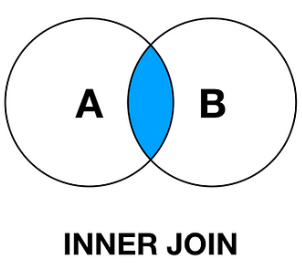

### 3.3.2 `LEFT JOIN`

A left join returns all rows from the left table, and the matched rows from the right table. If no match is found, NULLs are returned for columns of the right table.

```sql
SELECT columns
FROM table1
LEFT JOIN table2
ON table1.common_column = table2.common_column;
```

- **Use Case:** When you need all records from the left table, regardless of whether there are matches in the right table.
- **Example:** Get all employees and their department names, including those who are not assigned to any department.
  ```sql
  SELECT employees.emp_id, employees.name, departments.dept_name
  FROM employees
  LEFT JOIN departments
  ON employees.dept_id = departments.dept_id;
  ```

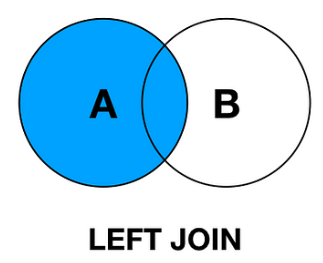

### 3.3.3 Left Anti Join (Left Join Excluding Inner Join)

A Left Join excluding Inner Join (also known as Left Anti Join) returns all the rows from the left table that do not have a match in the right table. This effectively gives you the rows in the left table that have no corresponding rows in the right table.

```sql
SELECT columns
FROM table1
LEFT JOIN table2
ON table1.common_column = table2.common_column
WHERE table2.common_column IS NULL;
```

- **Use Case:** When you need to find records in the left table that do not have corresponding records in the right table.
- **Example:** Find employees who are not assigned to any department
  ```sql
  SELECT employees.emp_id, employees.name
  FROM employees
  LEFT JOIN departments
  ON employees.dept_id = departments.dept_id
  WHERE departments.dept_id IS NULL;
  ```

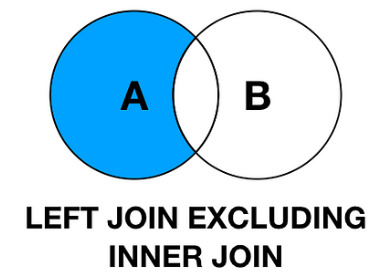

### 3.3.4 `RIGHT JOIN`

A right join returns all rows from the right table, and the matched rows from the left table. If no match is found, NULLs are returned for columns of the left table.

```sql
SELECT columns
FROM table1
RIGHT JOIN table2
ON table1.common_column = table2.common_column;
```

- **Use Case:** When you need all records from the right table, regardless of whether there are matches in the left table.
- **Example:** Get all departments and the employees in those departments, including departments with no employees.
  ```sql
  SELECT employees.emp_id, employees.name, departments.dept_name
  FROM employees
  RIGHT JOIN departments
  ON employees.dept_id = departments.dept_id;
  ```

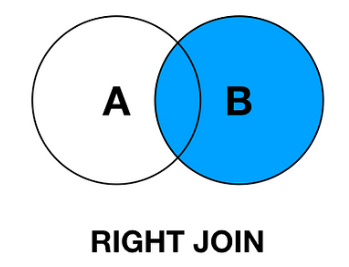

### 3.3.5 Right Anti Join (Right Join Excluding Inner Join)

A Right Join excluding Inner Join (also known as Right Anti Join) returns all the rows from the right table that do not have a match in the left table. This effectively gives you the rows in the right table that have no corresponding rows in the left table.

```sql
SELECT columns
FROM table1
RIGHT JOIN table2
ON table1.common_column = table2.common_column
WHERE table1.common_column IS NULL;
```

- **Use Case:** When you need to find records in the right table that do not have corresponding records in the left table.
- **Example:** Find departments that do not have any employees assigned
  ```sql
  SELECT departments.dept_id, departments.dept_name
  FROM employees
  RIGHT JOIN departments
  ON employees.dept_id = departments.dept_id
  WHERE employees.dept_id IS NULL;
  ```

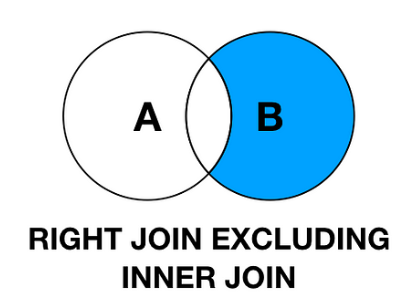

### 3.3.6 `FULL OUTER JOIN`

A full join returns all rows when there is a match in one of the tables. If there is no match, the result is NULL from the side where there is no match.

```sql
SELECT columns
FROM table1
FULL OUTER JOIN table2
ON table1.common_column = table2.common_column;
```

- **Use Case:** When you need all records from both tables, with matching records from both sides where available. Records without matches in either table will have NULLs.
- **Example:** Get all employees and their department names, including employees without departments and departments without employees.
  ```sql
  SELECT employees.emp_id, employees.name, departments.dept_name
  FROM employees
  FULL OUTER JOIN departments
  ON employees.dept_id = departments.dept_id;
  ```

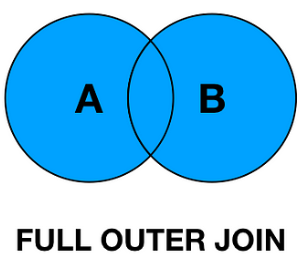

### 3.3.7 Full Anti Join (Full Outer Join Excluding Inner Join)

A Full Outer Join excluding Inner Join (also known as Full Anti Join) returns all the rows from both tables that do not have a match in the other table. This effectively gives you the rows that are unique to each table, excluding those that have corresponding rows in both tables.

```sql
SELECT columns
FROM table1
FULL OUTER JOIN table2
ON table1.common_column = table2.common_column
WHERE table1.common_column IS NULL OR table2.common_column IS NULL;
```

- **Use Case:** When you need to find records in both tables that do not have corresponding records in the other table.
- **Example:** Find employees without departments and departments without employees
  ```sql
  SELECT employees.emp_id, employees.name, departments.dept_id, departments.dept_name
  FROM employees
  FULL OUTER JOIN departments
  ON employees.dept_id = departments.dept_id
  WHERE employees.dept_id IS NULL OR departments.dept_id IS NULL;
  ```

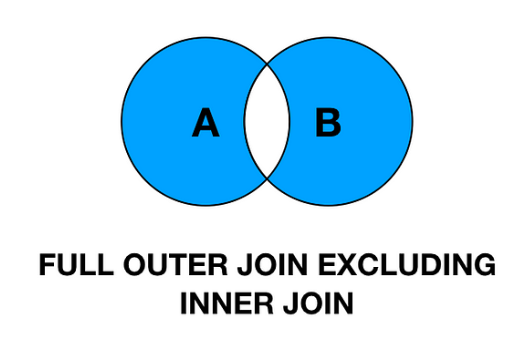

### 3.3.8 `CROSS JOIN`

A cross join returns the Cartesian product of the two tables. Each row from the first table is combined with all rows in the second table.

```sql
SELECT columns
FROM table1
CROSS JOIN table2;
```

- **Use Case:** When you need to combine all rows from two tables regardless of any condition.
- **Example:** Generate a combination of all employees and all projects.
  ```sql
  SELECT employees.emp_id, employees.name, projects.project_name
  FROM employees
  CROSS JOIN projects;
  ```

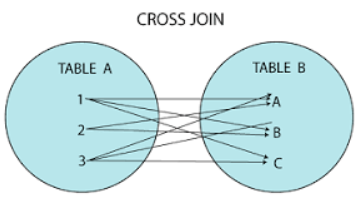 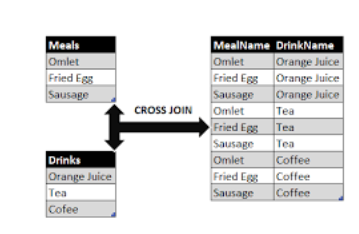

### 3.3.9 `SELF JOIN`

A self join is a regular join but the table is joined with itself.

```sql
SELECT a.columns, b.columns
FROM table a, table b
WHERE a.common_column = b.common_column;
```

- **Use Case:** When you need to compare rows within the same table.
- **Example:** Find pairs of employees where one is the manager of the other.
  ```sql
  SELECT e1.name AS employee, e2.name AS manager
  FROM employees e1
  INNER JOIN employees e2
  ON e1.manager_id = e2.emp_id;
  ```

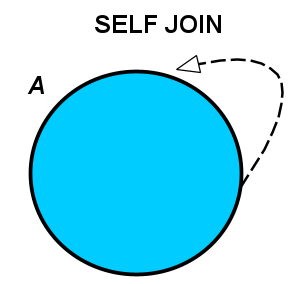

### 3.3.10 Using Aliases

Aliases can make the SQL statements shorter and easier to read.
```sql
  SELECT e.name, d.dept_name
  FROM employees e
  INNER JOIN departments d
  ON e.dept_id = d.dept_id;
  ```

### 3.3.11 Multiple Join Conditions

You can join tables on multiple conditions.
 ```sql
  SELECT columns
  FROM table1
  INNER JOIN table2
  ON table1.column1 = table2.column1
  AND table1.column2 = table2.column2;
  ```

## 3.4 Subqueries

A subquery is a query nested inside another SQL query. It is used to perform operations that require the result of another query. Subqueries can be used in SELECT, INSERT, UPDATE, and DELETE statements, and can be part of WHERE, HAVING, and FROM clauses.

### 3.4.1 Types of Subqueries

#### 3.4.1.1 Single-Row Subquery

Returns a single row and is used with operators like =, <, >, <=, >=, and <>. Example:

```sql
SELECT employee_name
FROM employees
WHERE department_id = (SELECT department_id
                       FROM departments
                       WHERE department_name = 'Sales');
```

#### 3.4.1.2 Multiple-Row Subquery

Returns multiple rows and is used with operators such as IN, ANY, or ALL. Example:

```sql
SELECT employee_name
FROM employees
WHERE department_id = (SELECT department_id
                       FROM departments
                       WHERE department_name = 'Sales');
```

#### 3.4.1.3 Multiple-Column Subquery

Returns multiple columns and is used with multiple column comparisons. Example:

```sql
SELECT employee_name
FROM employees
WHERE (department_id, job_id) IN (SELECT department_id, job_id
                                   FROM job_assignments
                                   WHERE status = 'Active');
```

### 3.4.2 Usage of Subqueries

#### 3.4.2.1 In `SELECT` Clause

To retrieve a value based on another query.

```sql
SELECT employee_name,
       (SELECT department_name
        FROM departments
        WHERE departments.department_id = employees.department_id) AS department
FROM employees;
```

#### 3.4.2.1 In `WHERE` Clause

To filter results based on another query.

```sql
SELECT employee_name
FROM employees
WHERE department_id = (SELECT department_id
                       FROM departments
                       WHERE department_name = 'Engineering');
```

#### 3.4.2.1 In `FROM` Clause

To use the result of a subquery as a table.

```sql
SELECT department_id, COUNT(*)
FROM (SELECT department_id
      FROM employees
      WHERE hire_date > '2022-01-01') AS recent_hires
GROUP BY department_id;
```

#### 3.4.2.1 In `HAVING` Clause

To filter groups based on aggregated results.

```sql
SELECT department_id, COUNT(*)
FROM employees
GROUP BY department_id
HAVING COUNT(*) > (SELECT AVG(employee_count)
                   FROM departments);
```

### 3.4.3 Logical Predicators and Operations in Subqueries

Logical predicates in SQL are used to control the flow of data based on conditions. Here are some common logical predicates and operations:

1. **EXISTS**
   - **Purpose:** Checks if a subquery returns any rows.
   - **Example:**
     ```sql
     SELECT employee_name
     FROM employees e
     WHERE EXISTS (SELECT 1
                   FROM departments d
                   WHERE d.department_id = e.department_id
                     AND d.manager_id = 101);
     ```

2. **NOT EXISTS**
   - **Purpose:** Checks if a subquery returns no rows. It is the opposite of `EXISTS`.
   - **Example:**
     ```sql
     SELECT employee_name
     FROM employees e
     WHERE NOT EXISTS (SELECT 1
                       FROM departments d
                       WHERE d.department_id = e.department_id
                         AND d.manager_id = 101);
     ```
3. **IN**
   - **Purpose:** Checks if a value matches any value in a list or subquery.
   - **Example:**
     ```sql
     SELECT employee_name
     FROM employees
     WHERE department_id IN (SELECT department_id
                             FROM departments
                             WHERE location = 'New York');
     ```
     
4. **ANY**
   - **Purpose:** Compares a value to any value in a set or subquery.
   - **Example:**
     ```sql
     SELECT employee_name
     FROM employees
     WHERE salary > ANY (SELECT salary
                         FROM employees
                         WHERE department_id = 10);
     ```

5. **ALL**
   - **Purpose:** Compares a value to all values in a set or subquery.
   - **Example:**
     ```sql
     SELECT employee_name
     FROM employees
     WHERE salary > ALL (SELECT salary
                         FROM employees
                         WHERE department_id = 10);
     ```

6. **BETWEEN**
   - **Purpose:** Filters rows within a specified range.
   - **Example:**
     ```sql
     SELECT employee_name
     FROM employees
     WHERE salary BETWEEN 50000 AND 100000;
     ```

7. **LIKE**
   - **Purpose:** Filters rows based on pattern matching.
   - **Example:**
     ```sql
     SELECT employee_name
     FROM employees
     WHERE employee_name LIKE 'J%';
     ```

### 3.4.4 Non-Correlated and Correlated Subqueries

- **Non-Correlated Subquery:** Independent of the outer query. The inner query executes once, and its result is used by the outer query.
  ```sql
  SELECT employee_name
  FROM employees
  WHERE department_id = (SELECT department_id
                         FROM departments
                         WHERE department_name = 'HR');
  ```

- **Correlated Subquery:** Dependent on the outer query. The inner query executes once for each row processed by the outer query.
  ```sql
  SELECT employee_name
  FROM employees e
  WHERE EXISTS (SELECT 1
                FROM departments d
                WHERE d.department_id = e.department_id
                  AND d.manager_id = 101);
  ```

## 3.5 Combining Query Results

Combining query results using `UNION` and `UNION ALL` in SQL allows you to merge the results of two or more queries into a single result set. Both operators are used to combine results, but they have different behaviors regarding duplicates and performance.

### 3.5.1 `UNION`

Combines the results of two or more queries and removes duplicate rows from the final result set.

```sql
SELECT column1, column2, ...
FROM table1
UNION
SELECT column1, column2, ...
FROM table2;
```

**Key Points:**
- **Duplicates:** `UNION` removes duplicate rows, ensuring that each row in the final result set is unique.
- **Column Matching:** Each `SELECT` statement must have the same number of columns, and the corresponding columns must have compatible data types.
- **Sorting:** You can use `ORDER BY` in the final `SELECT` statement to sort the combined results.

**Example:**
```sql
SELECT employee_name
FROM employees
WHERE department_id = 1
UNION
SELECT employee_name
FROM contractors
WHERE contract_type = 'Full-time';
```

### 3.5.2 `UNION ALL`

Combines the results of two or more queries without removing duplicate rows.

```sql
SELECT column1, column2, ...
FROM table1
UNION ALL
SELECT column1, column2, ...
FROM table2;
```

**Key Points:**
- **Duplicates:** `UNION ALL` includes all rows from the queries, including duplicates. It returns every row from each query.
- **Performance:** Typically faster than `UNION` because it does not require the additional step of removing duplicates.
- **Column Matching:** Like `UNION`, each `SELECT` statement must have the same number of columns with compatible data types.

**Example:**
```sql
SELECT employee_name
FROM employees
WHERE department_id = 1
UNION ALL
SELECT employee_name
FROM contractors
WHERE contract_type = 'Full-time';
```

## 3.6 `CASE` Statement

Implements conditional logic to return different values or perform different actions based on specified conditions.

### 3.6.1 Simple `CASE` Statement

```sql
CASE expression
    WHEN value1 THEN result1
    WHEN value2 THEN result2
    ...
    ELSE default_result
END
```

**Explanation:**
- **expression:** The value to be compared against `value1`, `value2`, etc.
- **`WHEN` value `THEN` result:** Compares the expression to `value`. If it matches, `result` is returned.
- **`ELSE` default_result:** Optional. Returned if none of the `WHEN` conditions are met.

**Example:**
```sql
SELECT employee_name,
       CASE department_id
           WHEN 1 THEN 'HR'
           WHEN 2 THEN 'IT'
           WHEN 3 THEN 'Finance'
           ELSE 'Other'
       END AS department_name
FROM employees;
```
- This query assigns a department name based on the `department_id`.

### 3.6.2 Searched `CASE` Statement

```sql
CASE
    WHEN condition1 THEN result1
    WHEN condition2 THEN result2
    ...
    ELSE default_result
END
```

**Explanation:**
- **`WHEN condition THEN result`:** Evaluates each `condition` in sequence. If a condition is true, the corresponding `result` is returned.
- **`ELSE default_result`:** Optional. Returned if none of the conditions are true.

**Example:**
```sql
SELECT employee_name,
       CASE
           WHEN salary > 100000 THEN 'High'
           WHEN salary BETWEEN 50000 AND 100000 THEN 'Medium'
           ELSE 'Low'
       END AS salary_level
FROM employees;
```
- This query categorizes salaries into 'High', 'Medium', or 'Low' based on salary ranges.

### 3.6.3 Usage in `SELECT` Clauses

To create new columns based on conditions.
```sql
  SELECT employee_name,
         CASE
             WHEN salary > 100000 THEN 'High'
             WHEN salary BETWEEN 50000 AND 100000 THEN 'Medium'
             ELSE 'Low'
         END AS salary_level
  FROM employees;
  ```

### 3.6.4 Usage in `WHERE` Clauses

To filter rows based on conditions.
  ```sql
  SELECT employee_name
  FROM employees
  WHERE CASE
            WHEN department_id = 1 THEN salary > 50000
            ELSE salary > 30000
        END;
  ```

### 3.6.5 Usage in `ORDER BY` Clauses

To sort results based on conditions.
  ```sql
  SELECT employee_name, salary
  FROM employees
  ORDER BY CASE
               WHEN department_id = 1 THEN 1
               WHEN department_id = 2 THEN 2
               ELSE 3
           END;
  ```

### 3.6.6 Usage in `HAVING` Clauses

To filter groups based on aggregated results.
  ```sql
  SELECT department_id, COUNT(*)
  FROM employees
  GROUP BY department_id
  HAVING CASE
             WHEN COUNT(*) > 10 THEN 'Large'
             ELSE 'Small'
         END = 'Large';
  ```

## 3.7 View

**SQL Views** are virtual tables in SQL that represent the result of a query. They provide a way to simplify complex queries, encapsulate logic, and present data in a specific format without storing the data physically.

**Definition:**
- A view is a saved SQL query that you can treat as a table. It does not store data itself but provides a way to access and manipulate data from one or more tables.

**Purpose:**
- **Simplicity:** Simplifies complex queries by encapsulating them in a view.
- **Security:** Restricts access to specific data by providing a limited view of the data.
- **Abstraction:** Provides a consistent interface for data access, even if the underlying schema changes.

### 3.7.1 Creating a View

**Syntax:**
```sql
CREATE VIEW view_name AS
SELECT column1, column2, ...
FROM table_name
WHERE condition;
```

**Example:**
```sql
CREATE VIEW employee_salaries AS
SELECT employee_name, salary
FROM employees
WHERE salary > 50000;
```

- This view, `employee_salaries`, presents the names and salaries of employees earning more than 50,000.

### 3.7.2 Querying a View

**Syntax:**
```sql
SELECT column1, column2, ...
FROM view_name;
```

**Example:**
```sql
SELECT employee_name, salary
FROM employee_salaries;
```

- This query retrieves data from the `employee_salaries` view as if it were a regular table.

### 3.7.3 Updating Data Through Views

**Updatable Views:**
- Some views allow updates if they meet certain criteria (e.g., simple views with a single base table).

**Syntax for Updating:**
```sql
UPDATE view_name
SET column1 = value1
WHERE condition;
```

**Example:**
```sql
UPDATE employee_salaries
SET salary = salary * 1.1
WHERE employee_name = 'John Doe';
```

- This query increases the salary of 'John Doe' by 10% in the `employee_salaries` view.

**Note:** Views with joins, aggregations, or multiple tables might not be updatable directly.

### 3.7.4 Dropping a View

**Syntax:**
```sql
DROP VIEW view_name;
```

**Example:**
```sql
DROP VIEW employee_salaries;
```

- This command removes the `employee_salaries` view from the database.

### 3.7.5 Modifying a View

**Syntax:**
```sql
CREATE OR REPLACE VIEW view_name AS
SELECT column1, column2, ...
FROM table_name
WHERE condition;
```

**Example:**
```sql
CREATE OR REPLACE VIEW employee_salaries AS
SELECT employee_name, salary, department_id
FROM employees
WHERE salary > 50000;
```

- This command updates the `employee_salaries` view to include the `department_id` column.

### 3.7.6 Materialized Views (not supported in mySQL)

**Definition:**
- Unlike regular views, materialized views store the result set physically. They are useful for improving query performance by precomputing and storing complex aggregations.

**Syntax (varies by database):**
```sql
CREATE MATERIALIZED VIEW view_name AS
SELECT column1, column2, ...
FROM table_name
WHERE condition;
```

**Example (PostgreSQL):**
```sql
CREATE MATERIALIZED VIEW sales_summary AS
SELECT region, SUM(sales_amount) AS total_sales
FROM sales
GROUP BY region;
```

- This creates a materialized view that stores the total sales per region.

### 3.7.7 Performance Considerations

- **Views:** Performance is similar to running the query directly, as the view query is executed each time the view is accessed.
- **Materialized Views:** Improve performance by storing the result set but require refreshes to keep data up-to-date.

### 3.7.8 Security and Access Control

- **Security:** Views can restrict access to sensitive columns or rows by only exposing specific parts of the data.
- **Access Control:** Users can be granted access to views without giving them direct access to the underlying tables.

**Example: Granting Access:**
```sql
GRANT SELECT ON view_name TO user;
```

**Example: Revoking Access:**
```sql
REVOKE SELECT ON view_name FROM user;
```

# 4. Data Control Language (DCL) `INCOMPLETE`

# 5. Transaction Control Language (TCL) `INCOMPLETE`

# 6. Stored Procedures and Functions `INCOMPLETE`

# 7. Triggers `INCOMPLETE`

# 8. Window Functions `INCOMPLETE`